# EDA

## Apa itu EDA

> [Exploratory Data Analysis (EDA)](https://www.itl.nist.gov/div898/handbook/eda/section1/eda1.htm) adalah sebuah pendekatan untuk memahami data. EDA dilakukan dengan pendekatan statistik maupun visual. 


Dengan melakukan EDA, berikut manfaat yang diperoleh:
1. Memahami permasalahan yang ada pada data kita, sehingga dapat merencanakan langkah-langkah data cleansing (pada step data preparation)
2. Merumuskan pertanyaan-pertanyaan bisnis lain, sehingga dapat mempertajam pertanyaan bisnis yang merupakan hasil dari step data understanding
3. Menghasilkan output berupa hasil analisis deskriptif yang dapat disajikan pada visualisasi data dan dashboard. Output ini kadang terasa cukup sebagai bahan pertimbangan pengambilan keputusan. 

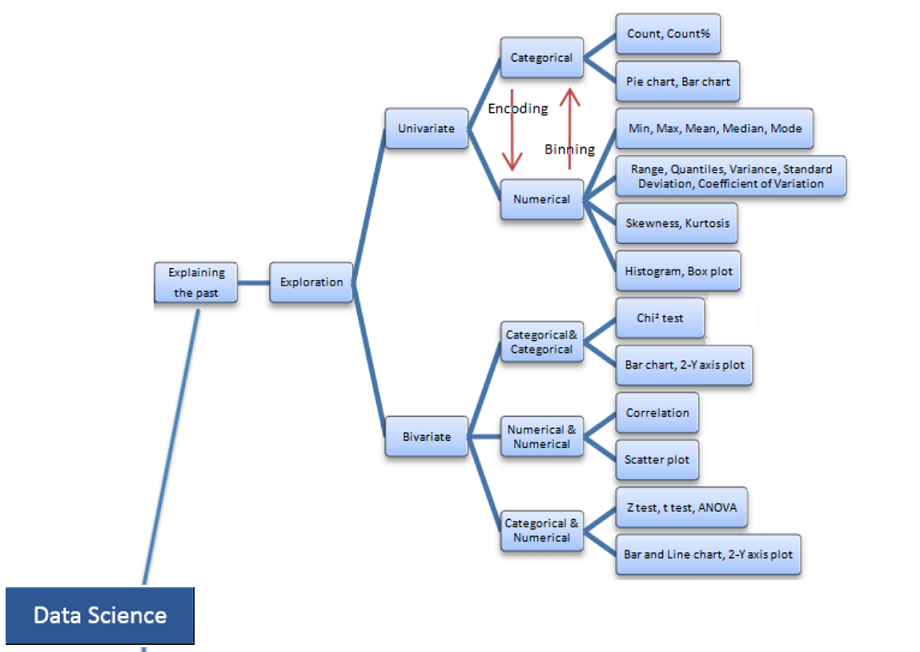

In [36]:
# # contoh sederhana
# import numpy as np
# import pandas as pd

# # membuat variable data
# x = np.array([10.00, 8.00, 13.00, 9.00, 11.00, 14.00, 6.00, 4.00, 12.00, 7.00, 5.00])
# y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# # menjadikan data tersebut sebagai dataframe
# dataset = pd.DataFrame({'x': x, 'y': y}, columns = ['x', 'y'])

# # print dataset
# dataset

In [38]:
# # melihat statistik sederhana dari dataset
# dataset.describe()

In [40]:
# # EDA menggunakan scatter plot
# import seaborn as sns

# sns.regplot(x, y, ci=None, line_kws={'color': 'green'})

[Knowlegde tambahan](https://www.itl.nist.gov/div898/handbook/eda/section1/eda16.htm):
1. Data yang ada tersebar di linear curve
2. Tidak ada outlier

## EDA dengan D-Tale

> [D-Tale](https://pypi.org/project/dtale/) is the combination of a Flask back-end and a React front-end to bring you an easy way to view & analyze Pandas data structures.

Keunggulannya:
1. Mudah digunakan.
2. Terintegrasi dengan ipython notebooks dan python/ipython terminals.
3. Sudah support DataFrame, Series, MultiIndex, DatetimeIndex & RangeIndex.

In [10]:
#!pip3 install dtale

In [515]:
# # import pandas as pd
# df_titanic = pd.read_csv('https://raw.githubusercontent.com/CRMDSDIP/PJJDAS_IV/main/Data_Preparation/day2/dataset/titanic.csv')

In [12]:
#import dtale
#dtale.show(df_titanic)

Hal yang akan kita eksplore menggunakan dtale.
1. Describe, Histogram, Categories, [Q-Q plot](https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0)
2. Cek outlier
3. Cek korelasi antara kolom
4. Cek missing value
5. Charts (mirip dengan point 1)

## EDA dan Manipulasi dengan Bamboolib

In [13]:
#!pip3 install bamboolib

In [45]:
# import bamboolib as bam
# df_titanic

# Missing Value and Outlier

Hasil EDA menunjukkan fakta berikut:
1. Terdapat missing value pada kolom ```Age```, ```Cabin```, ```Embarked```.
2. Outlier pada kolom ```Fare```.

## Penanganan Missing Value

Kenapa masalah Missing Value harus kita atasi?

> Missing values are common occurrences in data. Unfortunately, most predictive modeling techniques cannot handle any missing values. Therefore, this problem must be addressed prior to modeling.

Feature Engineering and Selection, 2019.

3 Tipe [Missing Value](https://blog.usejournal.com/missing-data-its-types-and-statistical-methods-to-deal-with-it-5cf8b71a443f):
1. Missing completely at random (MCAR). 
2. Missing at random (MAR). 
3. Missing not random (MNAR). 

<details>
<br>
Misal kita diminta untuk membuat model dari Age (Y) yang dipengaruhi oleh jenis kelamin (X) beberapa responden tidak memberikan jawaban atas pertanyaan berapa berat mereka. <br>
1. MCAR terjadi jika tidak ada alasan yang jelas kenapa responden tidak memberikan jawaban.<br>
2. MAR terjadi jika orang yang berjenis kelamin perempuan akan cenderung tidak memberikan jawaban jika ditanya berat, jadi missing value Y dipengaruhi oleh X.<br>
3. MNAR terjadi jika orang dengan kelas penghasilan tertentu, memiliki kecenderungan tidak memberikan jawaban. Sehingga missing value Y dipengaruhi oleh nilai lain yang tidak teramati.
</details>

Beberapa fungsi utama yang digunakan:
1. [library ```missingno```](https://github.com/ResidentMario/missingno)
2. [```df.isnull()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)
3. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
4. [```df.groupby()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
5. [```df.loc()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
6. [```df.column.plot()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html)
7. [```df.column.skew()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.skew.html)
8. [```df.column.value_counts()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

<details>

![MCAR](https://raw.githubusercontent.com/b4b3/PJJ_DAS/main/MAR_MCAR.png)

</details>

<details>
    
![handling missing value 1](https://raw.githubusercontent.com/b4b3/PJJ_DAS/main/handling_missing_value.png)
    
</details>

In [436]:
# # lihat missing value dengan fungsi .isnul()
# df_titanic.isnull().sum()

In [48]:
# df_titanic.isna().sum()

In [438]:
# # visualiasi missing value dengan bantuan library missingno
# import missingno as msno
# msno.matrix(df_titanic, figsize=(10, 6))

> Pertanyaan: missing value itu __dihapus__ atau bagaimana?

### Menghapus missing value

**Hapus Baris yang NA**

- `.dropna(how='any')`: hapus baris apabila memiliki **minimal 1 kolom** nilai missing value

- `.dropna(how='all')`: hapus baris apabila memiliki **semua kolom** nilai missing


In [77]:
# df_titanic_2=df_titanic.copy()

In [78]:
# df_titanic_2.describe()

In [79]:
# df_titanic_2.shape

In [80]:
# df_titanic_2.dropna(how='any', inplace=True)
# df_titanic_2.describe()

In [81]:
# df_titanic_3=df_titanic.copy()

In [82]:
# df_titanic_3.dropna(how='all', inplace=True)
# df_titanic_3.shape

In [83]:
# df_titanic_3.describe()

### Single Imputasi

#### Kolom Age

__Imputasi dengan mean atau median (Univariate)__ <br>

Metode pertama yang kita implementasikan adalah mengisi missing value dengan mean atau median berdasarkan perhitungan keseluruhan kolom ```Age``` saja.<br>

Hasilnya kita dapat memperhasikan efek yang berbeda dari pengisian tersebut dengan metode tersebut.

__Sebelum imputasi__

In [440]:
# # melihat distribusi awal dari kolom Age
# df_titanic.Age.plot.hist(title="Age Sebelum Imputasi", bins=20)

In [269]:
# # melihat kecondongan distribusi kolom Age. Kecondongan yang baik itu dari -1 sampai dengan 1
# df_titanic.Age.skew()

In [257]:
# # melihat mean kolom Age
# df_titanic.Age.mean()

In [258]:
# # melihat median kolom age
# df_titanic.Age.median()

__Imputasi__

In [442]:
# # fungsi fillna di pandas dapat digunakan untuk imputasi missing values
# # taruh hasilnya di variable baru untuk mempermudah pengamatan
# df_titanic['Age_mean_uni'] = df_titanic.Age.fillna(df_titanic.Age.mean())
# df_titanic['Age_median_uni'] = df_titanic.Age.fillna(df_titanic.Age.median())

__Setelah imputasi__

In [444]:
# # melihat histogram sebelum dan sesudah imputasi 
# df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].hist(bins=20, figsize=(10,5))

In [264]:
# # skewness sebelum dan sesudah imputasi
# df_titanic[['Age', 'Age_mean_uni','Age_median_uni']].skew()

__Imputasi dengan Mean berdasarkan kelompok/parameter lain (Multivariate)__ <br>

Solusi alternatif jika kita ingin melakukan imputasi missing value, dibandingkan kita memukul rata isian missing value pada kolom ```Age``` dengan mean atau median dari seluruh data. <br>

Kita bisa mengelompokan terlebih dahulu berdasarkan kolom lain (dalam hal ini adalah ```Sex``` sehingga imputasi dilakukan terhadap kelompok yang sama sehingga diharapkan hasilnya lebih <i>smooth</i>.

__Sebelum imputasi__

In [446]:
# # mengetahui mean per kelompok sex, kita menggunakan groupby
# df_grouped = df_titanic[['Sex', 'Age']].groupby(['Sex']).mean()
# df_grouped = df_grouped.reset_index()
# df_grouped

__Imputasi__

Setelah mengetahui mean dari masing-masing group, kita bisa melakukan imputasi.

In [448]:
# # mengambil nilai rata rata age yang sex nya male
# mean_male = df_grouped.loc[1,'Age']
# mean_male

In [450]:
# # imputasi untuk male group

# # filter kondisi 
# condition = df_titanic['Sex'] == 'male'

# # tangkap nilai mean untuk laki2 /male
# mean_male = df_grouped.loc[1,'Age']

# # imputasi
# df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_male)

In [452]:
# # proses untuk female sama seperti diatas
# condition = df_titanic['Sex'] == 'female'
# mean_female = df_grouped.loc[0,'Age']
# df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_female)

__Setelah imputasi__

In [455]:
# # melihat histogram sebelum dan sesudah imputasi 
# df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].hist(bins=20, figsize=(10,5))

In [457]:
# # skewness sebelum dan sesudah imputasi
# df_titanic[['Age', 'Age_mean_uni','Age_mean_multi']].skew()

__Simpulan__: Melihat hasil skewness dari ```Age_mean_multi``` yang cukup bagus (mendekati 0), kita memilih hasil ini untuk digunakan sebagai parameter bantu pada analisis selanjutnya. 

Namun dibuka kemungkinan apabila saat implementasi model, peforma dari model masih tidak sesuai harapan, ```Age_mean_multi``` dapat diganti dengan ```Age_mean_uni```.

#### Kolom Cabin

Pada kolom ```Cabin``` dikarenakan mayoritas data adalah missing value dan kita punya tidak cukup ide untuk mengisinya. 

Apabila kita paksa imputasi akan sangat bias dan tidak bisa menggambarkan situasi sebenarnya.  

Maka, solusinya kolom ```cabin``` lebih baik dihilangkan menggunakan fungsi ```.drop()```.

In [459]:
# df_titanic.Cabin

In [461]:
# # drop kolom menggunakan fungsi .drop()
# df_titanic.drop(columns='Cabin', inplace = True)

In [463]:
# # cek sisa kolom
# df_titanic.columns

__Simpulan__: Kolom ```Cabin``` sudah tidak lagi menjadi fitur dalam pengembangan model.

#### Kolom Embarked

In [115]:
# # cek value counts (size masing-masing kelas)
# df_titanic.Embarked.value_counts()

In [465]:
# # cek detail data yang kosong
# df_titanic[df_titanic.Embarked.isnull()]

In [467]:
# df_titanic.Ticket

Kita bisa membuat dugaan awal bahwa kolom ```Embarked``` ini mungkin ada kaitannya dengan kolom lain yakni ```Ticket```. 

Untuk itu lakukan penelusuran, apakah ada nomor tiket dengan pola sejenis dengan data hilang.

In [470]:
# # polanya di cek dengan fungsi .match
# # pola yang digunakan adalah cari tiket yang diawali dengan '113'

# df_titanic[(df_titanic.Ticket.str.match('^113'))].sample(3)

In [472]:
# # Cek tiket dengan nomor yang sama df_titanic[(df_titanic.Ticket== '113776)]
# df_titanic[df_titanic.Ticket.str.match('^113776')].Embarked.value_counts()

In [474]:
# # cek distribusi count tiket dengan pola str '113'
# df_titanic[df_titanic.Ticket.str.match('^113')].Embarked.value_counts()

Dari distribusinya tiket dengan nomor seri 113, memiliki probabilitas lebih tinggi bahwa penumpang naik dari pelabuhan ```S```.

In [476]:
# # kita bisa menggunakan modus dari distribusinya, yaitu 'S'
# # implementasi menggunakan fungsi .fillna()
# df_titanic.Embarked.fillna('S', inplace = True)

In [478]:
# # cek setelah implementasi
# df_titanic.Embarked.value_counts()

__Simpulan__: Hasil imputasi missing values pada kolom ```Embarked```, menambah jumlah kategori ```S``` dari 644 ke 646.

### Multivariate Imputation via Chained Equations (MICE)


Misalkan kita memiliki variabel $x_1, x_2, x_3, ...x_n$. Pada dataset anda, variabel $x_2$ dan $x_3$, dan $x_5$ mengalami beberapa data yang hilang.
* Pada saat anda ingin memunculkan nilai yang hilang dari $x_2$ maka variabel yang hilang akan diregres terhadap variabel $x_1$, $x_3$,  $x_4 - x_5$ 
* Pada saat anda ingin memunculkan nilai yang hilang dari $x_3$ maka variabel yang hilang akan diregres terhadap variabel $x_1$, $x_2$,  $x_4 - x_5$ 
* dst

Secara default, regresi linear digunakan untuk memprediksi nilai yang hilang bila variabel yang diprediksi adalah variabel kontinu dan regresi logistik bila variabel yang hilang adalah variabel kategorikal.

In [ ]:
#!pip3 install fancyimpute

In [479]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [481]:
# import pandas as pd
# import numpy as np
# # importing the MICE from fancyimpute library
# #from fancyimpute import IterativeImputer
  
# df = pd.DataFrame([[np.nan, 2, np.nan, 0],
#                    [3, 4, np.nan, 1],
#                    [np.nan, np.nan, np.nan, 5],
#                    [np.nan, 3, np.nan, 4],
#                    [5,      7,  8,     2],
#                    [2,      5,  7,     9]],
#                   columns = ['var1', 'var2', 'var3', 'var4'])
# df

In [483]:
# import pandas as pd
# #calling the MICE Class
# mice_imputer = IterativeImputer()

# #imputing the missing value with mice imputer
# df = mice_imputer.fit_transform(df)
# df_mice = pd.DataFrame(df, columns=['var1', 'var2', 'var3','var4'])
# df_mice



## Penanganan Outlier

Sumber:

1. https://www.mikulskibartosz.name/outlier-detection-with-scikit-learn/
2. https://www.kaggle.com/kevinarvai/outlier-detection-practice-uni-multivariate
3. https://nitin9809.medium.com/outlier-detection-and-treatment-part-1-aa0b09f60e50

Beberapa fungsi dan library yang digunakan:
1. library [```DBSCAN```](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).
2. library [```MinMaxScaler```](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).
3. [```df.quantile()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).
4. [```df.mean()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html).
5. [```df.fillna()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna).
5. dst.

![outlier](https://raw.githubusercontent.com/b4b3/PJJ_DAS/main/outlier.png)

### Deteksi outlier secara univariate

#### Three Sigma Rule

<details>
    
![Sigma](https://miro.medium.com/max/1400/1*IZ2II2HYKeoMrdLU5jW6Dw.png)
    
</details>

$P(a−3σ<X<a+3σ)=0.99730$

Kriteria Outlier untuk **Three Sigma Rule** :
> $|x_K-\bar x|>3\sigma$

Keterangan :
* $x_K$ adalah data ke-$k$, 
* $\bar x$ adalah rata-rata data, 
* $\sigma$ adalah standar deviasi

In [531]:
# # PEMBUATAN FUNGSI UNTUK KRITERIA OUTLIER
# def three_sigma_outlier (df):
#     if (abs(potassium-df['potassium'].mean())>(3*df['potassium'].std())):
#         return "Outlier"
#     else:
#         return "Not Outlier"

In [492]:
# import pandas as pd
# df=pd.read_csv('https://raw.githubusercontent.com/CRMDSDIP/PJJDAS_IV/main/Data_Preparation/day2/dataset/UScereal.csv')
# df.head(8)

In [532]:
# # VISUALISASI OUTLIER
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# plt.rcParams["figure.figsize"] = (20,6)

# df.plot(x ='Unnamed: 0', y='potassium', kind = 'scatter')
# plt.show()

In [496]:
# # LOAD FUNGSI UNTUK KRITERIA OUTLIER
# def three_sigma_outlier (potassium):
#     if (abs(potassium-df['potassium'].mean())>(3*df['potassium'].std())):
#         return "Outlier"
#     else:
#         return "Not Outlier"

#     # APLIKASI KE TABEL    
# df['result_3sigma']=df['potassium'].apply(three_sigma_outlier)
# df.head()

In [497]:
# # MELIHAT OUTLIER
# df.loc[df['result_3sigma']=='Outlier']

In [499]:
# # JIKA HENDAK MEMBUAT DATASET BARU MENGELUARKAN OUTLIER
# df_net=df.loc[df['result_3sigma']=='Not Outlier']
# df_net.head()

#### Hampel Identifier
Kriteria Outlier untuk Hampel Identifier : 3xMADM

> Median Absolute Value from The Median (MADM)

$MADM(x)=1.4826 \times median \{|x_K-x^+|\}$

Keterangan :
* $x_K$ adalah data ke $K$
* $x^+$ adalah median dari data

In [501]:
# # BUAT KOLOM UNTUK $x_k-x+$
# med=df['potassium'].quantile(0.50)
# def abs_med_dev (potassium):
#     return abs(potassium-med)

# # amd absolut median deviation
# df['amd']=df['potassium'].apply(abs_med_dev)
# df.head()

In [503]:
# med_abs = df['amd'].quantile(0.50)
# def hampel_outlier (potassium):
#     madm=1.4826*med_abs
#     if (potassium>3*madm):
#         return "Outlier"
#     else:
#         return "Not Outlier"
# df['result_hampel']=df['potassium'].apply(hampel_outlier)
# df

In [505]:
# # MELIHAT OUTLIER
# df.loc[df['result_hampel']=='Outlier']

#### Boxplot Outlier Rule

Kriteria Outlier untuk **Boxplot Outlier Rule** :
* $x_K>x_U+1.5Q$
* $x_K>x_L-1.5Q$

Keterangan :
* $x_K$ adalah data ke-$k$, 
* $x_U$ adalah kuartil ke-$1$ atau disebut kuartil bawah (*lower quartile*), 
* $x_L$ adalah kuartil ke-$3$ atau disebut kuartil bawah (*upper quartile*), 
* $Q$ adalah jangkuan interkuartil (selisih kuartil bawah - kuartil atas) 

<details>

![boxplot_iqr.png](https://raw.githubusercontent.com/b4b3/PJJ_DAS/main/boxplot_iqr.png)
    
</details>

**Interquartile range**

IQR mendeskripsi bagian tengah atau 50% dari nilai jika diurutkan dari terendah ke tertinggi.

Untuk mendapatkan nilai IQR, langkah pertama adalah menemukan ```median``` dari ```batas bawah (Q1)``` dan ```batas atas (Q3)``` dari distribusi data.

IQR adalah beda antara Q3 dan Q1.

Kemudian setelah mendapatkan IQR, kita akan menghitung whisker minimal (iqr_lower) dan maksimal (iqr_upper).

Nilai diluar iqr_lower dan iqr_upper adalah outlier.

In [533]:
# # FUNGSI OUTLIER RULE
# # kuartil bawah
# low_q=df['potassium'].quantile(0.25)
# # kuartil atas
# upr_q=df['potassium'].quantile(0.75)
# # jarak antar kuartil
# iq_d=df['potassium'].quantile(0.75)-df['potassium'].quantile(0.25)

# def boxplot_outlier (potassium):
#     if (potassium>upr_q+1.5*iq_d) or (potassium<low_q-1.5*iq_d):
#         return "Outlier"
#     else:
#         return "Not Outlier"

In [508]:
# df['result_boxplot']=df['potassium'].apply(boxplot_outlier)
# df

#### Penanganan Outlier pada dataset titanic

In [228]:
# menampilkan kolom fare dalam boxplot
# df_titanic.Fare.plot.box()

In [230]:
# # menghitung Q1 dan Q3
# q1 = df_titanic['Fare'].quantile(0.25)
# q3 = df_titanic['Fare'].quantile(0.75)

# # menghitung IQR
# iqr = q3 - q1

# # menghitung batas bawah dan batas atas
# iqr_lower = q1 - 1.5 * iqr
# iqr_upper = q3 + 1.5 * iqr

In [232]:
# # print hasil
# (iqr_lower, iqr_upper)

In [234]:
# # contoh outlier dengan nilai kurang dari iqr_lower
# df_titanic[df_titanic.Fare < iqr_lower]

In [236]:
# # contoh outlier dengan nilai lebih dari iqr_upper
# df_titanic[df_titanic.Fare > iqr_upper].sample(3)


In [295]:
# # menghitung kolom fare yang lebih besar dari iqr_upper
# (df_titanic.Fare > iqr_upper).sum()

Apa yang harus kita lakukan, pilihan opsinya:
1. Membuang outlier tersebut.
2. Melakukan imputasi nilai. 

Disini kami contohkan untuk melakukan imputasi menggunakan mean.

In [245]:
# # ganti nilai outlier dengan na sehingga menjadi missing value
# df_titanic['Fare_iqr'] = df_titanic['Fare']
# df_titanic.loc[df_titanic['Fare_iqr'] < iqr_lower, 'Fare_iqr'] = pd.NA
# df_titanic.loc[df_titanic['Fare_iqr'] > iqr_upper, 'Fare_iqr'] = pd.NA

In [246]:
# # cek implementasi missing value
# df_titanic.Fare_iqr.isna().sum()

In [296]:
# # imputasi NaN dengan mean

# df_titanic['Fare_iqr'].fillna(df_titanic.Fare.mean(),inplace=True)

# # tampilkan box plot
# boxplot = df_titanic.boxplot(column=['Fare','Fare_iqr'])

In [249]:
# # menghitung missing value setelah diimput
# df_titanic.Fare_iqr.isna().sum()

In [251]:
# # menampilkan boxplot kolom fare_iqr
# boxplot = df_titanic.boxplot(column=['Fare_iqr'])

__Simpulan__: Perlu kehati-hatian dalam mengimplementasikan metode IQR. IQR dapat digunakan apabila sebaran data kita sempit.

### Deteksi outlier secara multivariate

Deteksi outlier bedasarkan pengamatan terhadap lebih dari 1 features biasa dikenal dengan multivariate outlier detections. 

Dalam kasus ini kita coba mengkoreksi data outlier ```Fare``` dengan bantuan dari variable lain yakni ```Age```.

Kemudian kita melihat apakah ada outlier dengan melihat kerapatan data menggunakan metode [__Density-Based Spatial Clustering of Applications with Noise (DBSCAN)__](https://towardsdatascience.com/dbscan-with-python-743162371dca).
> Metode clustering menggunakan machine learning untuk memisahkan cluster dengan density tinggi dari cluster dengan density rendah.

<details>

![dbscan](https://miro.medium.com/max/1400/1*PenJiBtSaeDZD9P9XhLBmA.png)
    
</details>

__Sebelum imputasi__

In [298]:
# # load dictionary
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import DBSCAN

# # lakukan standarisasi data agar skalanya sama
# scaler = MinMaxScaler()
# df_titanic['Fare_scaled'] = scaler.fit_transform(df_titanic[['Fare']])
# df_titanic['Age_scaled'] = scaler.fit_transform(df_titanic[['Age_mean_uni']])

# # visualisasikan dua features ini dalam bentuk scatter
# df_titanic.plot.scatter(y = 'Fare_scaled', x = 'Age_scaled')

In [304]:
# # membuat model dbscan
# DBSCAN_model = DBSCAN(eps = 0.5, metric = 'euclidean', min_samples = 3, n_jobs = -1)

# # fit model
# clusters = DBSCAN_model.fit_predict(df_titanic[['Fare_scaled', 'Age_scaled']])

# # simpan hasil clustering ke kolom baru
# df_titanic['Is_outlier'] = clusters

# # hasil cluster akan ada dua 0 tidak outlier, 1 merupakan outlier
# pd.Series(clusters).value_counts() 

In [306]:
# # menghitung kolom is_outlier
# df_titanic.Is_outlier.value_counts()

In [197]:
# # lookup data yang outlier
# df_titanic[df_titanic['Is_outlier']==1]

__Imputasi dengan Mean dari kolom Fare saja__

In [535]:
# # membuat satu kolom baru yang isinya sama dengan Fare
# df_titanic['Fare_dbscan'] = df_titanic['Fare']

In [537]:
# # dapatkan mean dari Fare
# fare_mean = df_titanic[df_titanic['Is_outlier']==0].Fare.mean()

# # isikan nilai mean ke nilai outlier
# df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean

__Setelah imputasi__

In [539]:
# # pengecekan nilai Fare_dbscan
# df_titanic.loc[df_titanic['Is_outlier']==1]

In [316]:
# # menampung dalam dataframe baru untuk melihat perubahan kolom fare dan fare dbscan dg bamboolib
# df_titanic_isoutlier = df_titanic.loc[df_titanic['Is_outlier'] == 1]


# df_titanic_isoutlier

__Imputasi dengan Mean hasil analisis dari kolom Embarked__

Sebagaimana kita ketahui bahwa hasil deteksi outlier di atas, kesemuanya berangkat dari pelabuhan C dengan seri ```Ticket``` yang sama. 

Dibandingkan menggunakan mean dari seluruh penumpang, kita bisa coba gunakan mean dari penumpang lain dari kelompok pemberangkatan ```Embarked``` yang sama.

In [329]:
# # melihat mean dari setiap embarked dengan describe
# df_titanic.loc[df_titanic['Is_outlier']==0, ['Fare','Embarked']].groupby(by='Embarked').agg(['describe'])

In [330]:
# # isikan nilai mean ke kolom fare_dbscan  
# fare_mean_C = df_titanic[(df_titanic['Is_outlier'] == 0) & (df_titanic['Embarked'] == 'C')].Fare.mean()
# df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = fare_mean_C

In [331]:
# #pengecekan nilai Fare_dbscan
# hasil=df_titanic.loc[df_titanic['Is_outlier']==1]
# hasil

__Jika kita mengasumsikan terjadi salah ketik di harga tiket (fare)__

Dari deskripsi statistik masing-masing group ```Embarked``` mean untuk data ```Fare``` penumpang yang berangkat dari pelabuhan C memiliki mean di nilai ```51.73```. 

Kita dapat juga berasumsi bahwa outlier ```512.3292``` itu bisa jadi typo dan mungkin maksudnya ```51.2329```

In [337]:
# # langsung koreksi 
# df_titanic.loc[df_titanic['Is_outlier']==1, 'Fare_dbscan'] = 51.2329

In [335]:
# # cek nilai fare_dbscan 
# # Step: Select columns
# df_titanic_ = df_titanic[['PassengerId', 'Fare', 'Fare_scaled', 'Fare_iqr', 'Fare_dbscan', 'Is_outlier']]

# # Step: Keep rows where Is_outlier == 1
# df_titanic_ = df_titanic_.loc[df_titanic_['Is_outlier'] == 1]

# df_titanic_

__Simpulan__: Untuk mempertajam analisis kita saat mendeteksi outlier, kita bisa menggunakan kolom lain sebagai fitur tambahan dan mengimplementasikannya menggunakan DBSCAN.

Kita menggunakan kolom embark sebagai fitur yang dapat membantu kita mendeteksi outlier pada kolom Fare.

### Winsorization

merupakan salah satu metode transformasi statistik dengan membatasi nilai-nilai ekstrim data.
Disebut Winsorization karena metode ini ditemukan oleh biostatistisi Charles P. Winsor (1895–1951).
Strategi umum dari Winsorization adalah dengan menspesifikasi persentil data.
Winsorization 90% berarti 
* mengganti semua data di bawah 5% persentil menjadi 5%
* mengganti semua data di atas 95% persentil menjadi 95%

In [216]:
# # Misalkan kita memiliki list data :
# dataA=[3, 14, 16, 16, 17, 29, 34, 36, 39, 47, 59, 64, 65, 66, 68, 79, 91, 98]
# import numpy as np
# q05=np.quantile(dataA, .05)
# q95=np.quantile(dataA, .95)
# print(q05)
# print(q95)

In [218]:
# dataA

In [220]:
# dataB=[]
# for i in dataA:
#     if (i<q05):
#         i=q05
#     elif (i>q95):
#         i=q95
#     dataB.append(i)
            
    
    
# print('dataA :{}'. format(dataA))        
# print('dataB :{}'.format(dataB))

# Feature Enginering 

Dari hasil sementara EDA, tanamkan hal berikut di pikiran kita:
1. Apakah ada kemungkinan untuk mendapatkan tambahan informasi atau mengurangi noise dari datanya.
2. Bisakah kita mengkombinasikan data dalam bentuk berbeda, sehingga menjadi lebih informatif.
3. Adakah kemungkinan kita untuk menggunakan data tambahan dari eksternal.

Sumber: https://towardsdatascience.com/what-is-feature-engineering-bfd25b2b26b2

Kunci: __KREATIF !__

## Ekstraksi inisial dari kolom Name sebagai fitur

Jika kita telusuri di kolom name akan terlihat bahwa kolom ini adalah kolom yang sangat unik dengan tingkat cardinality yang tinggi. 

Beberapa dari kita mungkin akan melakukan drop terhadap kolom ini.

Namun jika bisa lebih teliti, ada satu pola yang kita bisa ekstrak dan memberikan nilai tambah pada dataset kita.

Dalam hal ini, kita akan melakukan ekstraksi gelar sosial pada nama seperti Mr. Miss. Mrs. sebagai menggunakan regex.

Beberapa fungsi dan library yang digunakan:
1. [```RegEx```](https://docs.python.org/3/howto/regex.html).
2. ```df.column.replace()```.
3. ```df.column.value_counts()```
4. Library [```One Hot Encoder```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
5. dst.

In [339]:
# # melihat kolom name
# df_titanic[['Name']].sample(5)

In [521]:
# extract gelar pada nama menggunakan regex dan simpan ke kolom baru
df_titanic['Initial'] = df_titanic.Name.str.extract('(\w+)\.')

In [343]:
# # cek distribusi count
# df_titanic.Initial.value_counts()

In [540]:
# # melakukan perbaikan atas inisial yang mungkin salah tulis, atau tidak sesuai kriteria
# # menggunakan fungsi .replace()
# # cari tau maksud inisalnya dulu

# replace_dict =  {'Mlle': 'Miss',
#                  'Mme': 'Miss',
#                  'Ms': 'Miss',
#                  'Dr': 'Mr',
#                  'Major': 'Mr',
#                  'Lady': 'Mrs',
#                  'Countess': 'Mrs',
#                  'Jonkheer': 'Other',
#                  'Col': 'Other',
#                  'Rev': 'Other',
#                  'Capt': 'Mr',
#                  'Sir': 'Mr',
#                  'Don': 'Mr'}

# df_titanic['Initial'].replace(replace_dict,inplace=True)

In [541]:
# # cek distribusi count setelah perbaikan

# df_titanic.Initial.value_counts()

__Simpulan__: Telah diekstraksi data dari kolom Name menjadi informasi yang bernilai tambah, dan disimpan pada kolom Initial.

## Pengelompokan penumpang berdasarkan kolom Age (Binning)

[Binning](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950) adalah teknik mengkonversi data numerical menjadi categorical, dengan menggunakan range.

Fungsi yang digunakan, [```pd.cut()```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

Misalkan:

|Age|Category|
|--- |--- |
|0-15|child|
|16-30|young_adult|
|31-50|adult|
|>50|elderly|

In [542]:
# # membuat varible baru bernama cut_points
# # merupakan batas dari setiap kategori
# cut_points = [0, 15, 30, 50, 100]

# # membuat label atas kategorinya
# age_label = ['child', 'young_adult', 'adult', 'elderly']

# # implementasi label tersebut dengan membuat kolom baru bernama age_label
# df_titanic['Age_group'] = pd.cut(df_titanic['Age_mean_uni'], bins=cut_points, labels=age_label, include_lowest=True)

In [351]:
# # print hasil implementasi
# df_titanic.sample(3)[['Age_group','Age_mean_uni']]

__Simpulan__: Telah dikategorikan range ```Age``` pada kolom ```Age_group```.

# Transformasi Variabel

## Encoding

Encoding merupakan metode untuk mengubah data kategorikal ke dalam format bilangan bulat. Ada beberapa macam encoding, antara lain label encoding, binary encoding, hash encoding, target encoding, dll. Untuk melakukan encoding kita bisa menggunakan :
* library LabelEncoder.
* dictionary {}.
* df.Series.map().
* dst.


### Label Encoding

Digunakan untuk mengubah sekumpulan label ke dalam format integer sehingga bisa dilakukan komputasi.

Label encoding digunakan untuk mengubah data categorical menjadi nominal.

#### Kolom Sex

In [543]:
# # cek ada berapa label pada kolom sex
# df_titanic['Sex'].unique()

Karena hanya ada 2 distinct values (low cardinality), kita cukup pakai dictionary untuk labeling.

In [544]:
# membuat dictionary, 0 untuk male dan 1 untuk female
# label_sex = {'male':0,'female':1}

# # gunakan fungsi map pada pandas untuk mengaplikasikan labeling
# df_titanic['Sex_enc'] = df_titanic['Sex'].map(label_sex)

# # print hasil implementasi
# df_titanic[['Name','Sex','Sex_enc']].sample(3)

__Simpulan__: kategori male dan female sudah berubah menjadi 0 dan 1.

### Dictionary

#### Kolom Embarked

Jika jumlah kelas pada variabel kategori sangat banyak (high cardinality).

Kita __tidak mungkin melakukannya secara manual__ menggunakan dictionary. 

Oleh karenanya kita perlu menggunakan bantuan library salah satunya adalah [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) di scikit learn.

In [545]:
# # load library
# from sklearn.preprocessing import LabelEncoder

# # inisiasi encoder
# le = LabelEncoder()

# # fiting dan transform ke model
# df_titanic['Embarked_enc'] = le.fit_transform(df_titanic['Embarked'])

In [546]:
# # print hasil implementasi
# df_titanic[['Name','Embarked','Embarked_enc']].sample(3)

__Simpulan__: kategori C, Q, dan S sudah berubah menjadi 0, 1 dan 2.

### One Hot Encoding

* Pada one hot encoding, kita mengkonversi satu feature menjadi beberapa fitur yang nilainya 0 atau 1.


#### Kolom Initial

Dari hasil ekstraksi fitur, kita memperoleh lima jenis kategorikal.

Sebelumnya kita sudah kenal cara melakukan encoding dengan menggunakan dictionary dan LabelEncoder.

Untuk kali ini akan kita implementasikan satu teknik lainnya, yaitu One Hot Encoding. 
jadi ga ada kategori yang lebih tinggi dari yang lainnya dan tiap kategori dalam satu kolom akan dipecah menjadi bbrp kolom baru dengan nilai 0 atau 1

__Kenapa kita menggunakannya?__

Label Encoding adalah kategori sekarang memiliki [urutan (natural order)](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/). 

Komputer secara alami akan memberikan angka yang lebih tinggi, bobot yang lebih tinggi. 

Untuk mengatasinya kita menggunakan One Hot Encoding.

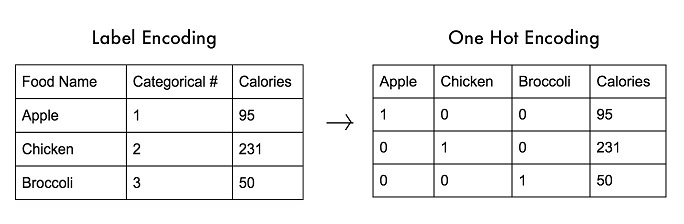

Sumber: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179

In [547]:
# # load library 
# from sklearn.preprocessing import OneHotEncoder 

# # inisiasi encoder 
# ohc = OneHotEncoder(handle_unknown='ignore')

# # fit dan transform
# new_features = ohc.fit_transform(df_titanic[['Initial']])

# # masukan ke dataframe hasilnya
# cols_name= [x for x in df_titanic['Initial'].unique()]
# df_initial_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

# df_initial_ohc.sample(3)

In [548]:
# # gabung hasilnya ke df_titanic
# df_titanic = pd.concat([df_titanic, df_initial_ohc], axis=1)

In [550]:
# # print hasil implementasi
# df_sample = df_titanic.sample(3)
# df_sample

__Simpulan__: Sudah diimplementasikan OHE pada kolom ```Initial```.

#### Kolom Age_group

Sama seperti sebelumnya, kita akan implementasikan OHE untuk kolom ```Age_group```.

In [551]:
# fit dan transform
# new_features = ohc.fit_transform(df_titanic[['Age_group']])

# # masukan ke dataframe hasilnya
# cols_name= [x for x in df_titanic['Age_group'].unique()]
# df_age_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

# df_age_group_ohc.sample(3)

In [430]:
# # gabung hasilnya ke df_titanic
# df_titanic = pd.concat([df_titanic, df_age_group_ohc], axis=1)

In [429]:
# print hasil implementasi

# df_titanic.sample(3)

__Simpulan__: Sudah diimplementasikan OHE pada kolom ```Age_group```.

In [428]:
# df_titanic.columns

In [427]:
# columns_to_keep = ['Survived', 'Pclass', 'Fare_dbscan', 'Sex_enc', 'Embarked_enc', 'Mr',
#                    'Mrs', 'Miss', 'Master', 'Other', 'young_adult', 'adult', 'elderly',
#                    'child']

In [426]:
# df_titanic = df_titanic[columns_to_keep]

In [425]:
# df_titanic.head(3)

## Ekstract Date Time

* Terdapat masa dimana pada suatu masalah prediktif, variabel waktu memiliki kontribusi tertentu.
* Misalkan, pada data time series kita menemukan adanya siklus pada hari/bulan/jam tertentu. Untuk itu, kita perlu memunculkan potongan informasi waktu tersebut.

### Mengekstrak Potongan Tanggal atau Waktu dari Timestamp

In [553]:
# import pandas as pd
# data_waktu=pd.read_csv('https://raw.githubusercontent.com/CRMDSDIP/PJJDAS_IV/main/Data_Preparation/day2/dataset/TPIA.csv')
# data_wkt=data_waktu[['date', 'previous', 'open_price', 'close']].copy()
# data_wkt['date'] = pd.to_datetime(data_wkt['date'])
# data_wkt.head()

### Mengekstrak tanggal saja

In [423]:
# data_wkt['tanggal'] = data_wkt['date'].dt.date
# data_wkt.head()

### Mengekstrak jam saja

In [422]:
# data_wkt['jam'] = data_wkt['date'].dt.time
# data_wkt.head()

### Mengekstrak tahun

In [421]:
# data_wkt['tahun'] = data_wkt['date'].dt.year
# data_wkt.head()

### Mengekstrak kuartal

In [420]:
# data_wkt['kuartal'] = data_wkt['date'].dt.quarter
# data_wkt.head()

### Mengekstrak bulan

In [419]:
# data_wkt['bulan'] = data_wkt['date'].dt.month
# data_wkt.head()

### Mengekstrak Hari


In [418]:
# data_wkt['hari'] = data_wkt['date'].dt.dayofweek
# data_wkt.head()

### Mengoperasikan tanggal

In [417]:
# #menghitung 7 hari ke depan
# from datetime import timedelta
# data_wkt['tgl_migdep'] = data_wkt['date'] + timedelta(days=7)
# data_wkt.head()

### Menghitung selisih waktu

In [416]:
# data_wkt['delta_hari'] = (data_wkt['tgl_migdep'] - data_wkt['date']).dt.days
# data_wkt.head()

## Menciptakan Feature dari Komputasi Matematis

In [415]:
# data_cmp=data_waktu[['date', 'previous', 'open_price', 'close']].copy()
# data_cmp.head()

### Operasi antar kolom

In [414]:
# data_cmp['Selisih']=data_cmp['close']-data_cmp['open_price']
# data_cmp.head()

### Operasi dengan skalar

In [413]:
# data_cmp['add_close']=data_cmp['close']+20000
# data_cmp.head()

### Memberikan kategori

In [412]:
# def ur (selisih):
#     if selisih>0 :
#         return 'Untung'
#     elif selisih==0:
#         return 'Sama'
#     else:
#         return 'Rugi'
# data_cmp['kategori']=data_cmp['Selisih'].apply(ur)
# data_cmp.head()